# Tutorial 12: Binary or Discrete Counts Responses

#### Lecture and Tutorial Learning Goals:
After completing this week's lecture and tutorial work, you will be able to:

1. Describe the logistic regression estimation procedure (categorical data as the response variable and explanatory variables), and Poisson regression estimation procedure (discrete counts as the response variable and explanatory variables).
2. Discuss the relationship between linear regression and logistic and Poisson regression. Discuss the consequences of modeling data that is more suitable for logistic and Poisson regression models as a linear regression model.
3. Interpret the coefficients and $p$-values in the logistic and Poisson regression settings.
4. Discuss useful diagnostics for logistic and Poisson regression and explain why they should be performed.
5. Write a computer script to perform logistic and Poisson regression and perform model diagnostics. Interpret and communicate the results from that computer script.

In [1]:
# Run this cell before continuing.
library(tidyverse)
library(repr)
library(infer)
library(gridExtra)
library(mlbench)
library(AER)
library(ISLR)
library(broom)
library(qqplotr)
library(performance)
library(see)
library(MASS)
library(glmbb)
library(cowplot)
source("tests_tutorial_12.R")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Loading required package: car

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some


Loading required package: lmtest

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:



## 1. Poisson Regression

Let us proceed with Poisson regression. This class of GLM is intended for cases where the response is a count (i.e., an integer). What do we mean by this? Firstly, we will load the dataset to be used in this section. The data frame `crabs` ([Brockmann, 1996](https://ubc.summon.serialssolutions.com/2.0.0/link/0/eLvHCXMwrV3JasMwEBUlpZBLl7Sl6YY_oE4sy5sgFEpICKU9NadcjFYSmtghCyRf0t-tJC_EPhRaepMHS8jSSPM0M3oGALkdx67tCYRyKV0GacCp9CBX60RCySMcYiigy2qpOq_F1ZiMLqL0v-mFYrZvvd4JXXcPEnOUZbU1z6W-fxdoh6eO-XQUvDyGCnXrbK_hxCkDDCHKgs9KH20FelDOR_pzWxXbdYhljTEanoF10e8iC6V2SbDK9Pg_H3gOTnPsar1kynYBjkTSAs1yC923wMkkNaVL8NVbkNXn8wcxjJ8b0euaZysTvyuzVJUYH9i6Kpsl1ijVOSbTtPZ2f6V6nYuectnbbLGdb2tNLNP5fjkVi1J-BcbDwbg_svOfQNhMIRdsu4KHEnIsIiQYJoGQvsKQmAuOsE8lojRnrPEIlZQHHIUEEs8PBVHQjaJr0EjSRNwAS8ebmMNk4DHkRYgQSt2ARoxRnzuhJG2AitmNlxnVR3x4REI41sMf6-GP8-GPd20QmVn7RZV4MB7p0u3fq96BZpY-rn1B96CxWW3FgyGOeDR6_g1rIQSN)) is a dataset detailing the **counts** of satellite male crabs residing around a female crab nest: `n_males`. 

> The data frame `crabs` contains 173 observations on horseshoe crabs (*Limulus polyphemus*). The response is the count of male crabs (`n_males`) around a female breeding nest. It is subject to four input variables: a factor for the `color` of the prosoma with four levels, a factor for the condition of the posterior `spine` with three levels, the continuous variables for carapace `width` (cm), and `weight` (g).

Run the cell below before proceeding.

In [2]:
data(crabs)
crabs <- crabs %>%
  rename(n_males = satell) %>%
  dplyr::select(-y)

str(crabs)
head(crabs)

'data.frame':	173 obs. of  5 variables:
 $ color  : Factor w/ 4 levels "dark","darker",..: 4 1 3 1 1 4 3 1 4 1 ...
 $ spine  : Factor w/ 3 levels "bad","good","middle": 1 1 2 1 1 1 2 3 2 1 ...
 $ width  : num  28.3 22.5 26 24.8 26 23.8 26.5 24.7 23.7 25.6 ...
 $ n_males: int  8 0 9 0 4 0 0 0 0 0 ...
 $ weight : int  3050 1550 2300 2100 2600 2100 2350 1900 1950 2150 ...


,color,spine,width,n_males,weight
,<fct>,<fct>,<dbl>,<int>,<int>
1,medium,bad,28.3,8,3050
2,dark,bad,22.5,0,1550
3,light,good,26.0,9,2300
4,dark,bad,24.8,0,2100
5,dark,bad,26.0,4,2600
6,medium,bad,23.8,0,2100


**Question 1.1**
<br>{points: 1}

Create a scatterplot of `n_males` versus carapace `width` (via `geom_point()`), even though `n_males` is not continuous. The `ggplot()` object's name will be `Crabs_vs_width_scatterplot`. Recall that the response must be placed on the $y$-axis, whereas the continuous input must be on the $x$-axis. Include proper axis labels and title.

*Fill out those parts indicated with `...`, uncomment the corresponding code in the cell below, and run it.*

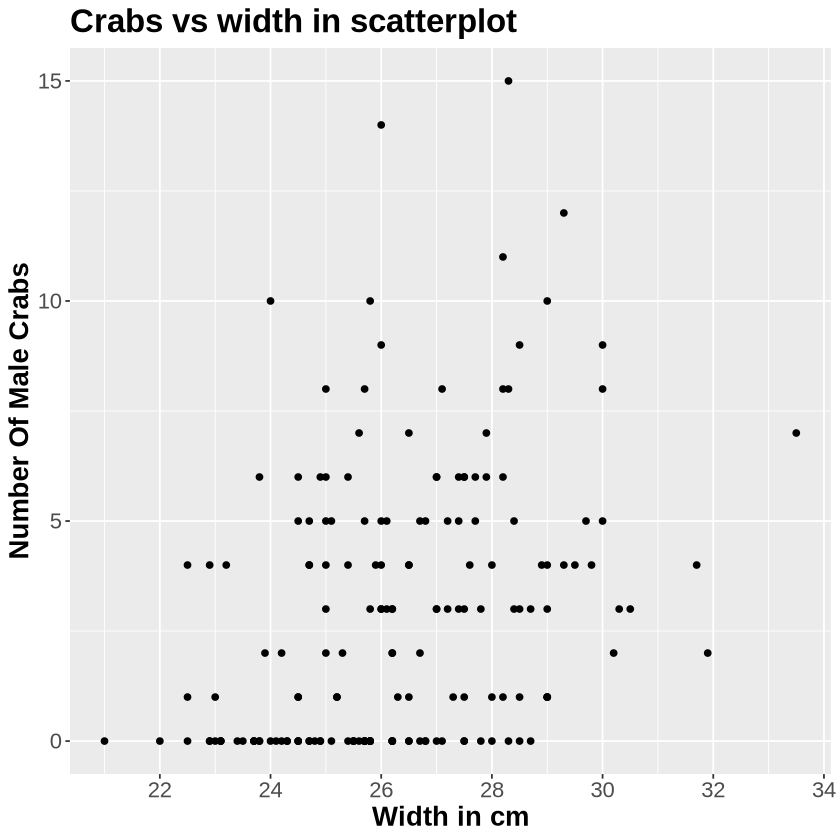

In [3]:
# Crabs_vs_width_scatterplot <- 
#   ... %>%
#   ggplot() +
#   ...(aes(..., ...)) +
#   labs(y = ..., x = ...) +
#   ggtitle(...) +
#   theme(
#     text = element_text(size = 16.5),
#     plot.title = element_text(face = "bold"),
#     axis.title = element_text(face = "bold"),
#     legend.title = element_text(face = "bold")) + 
#   scale_x_continuous(breaks = seq(20, 34, 2))

# your code here
Crabs_vs_width_scatterplot <- 
  crabs %>%
  ggplot() +
  geom_point(aes(width, n_males)) +
  labs(y = "Number Of Male Crabs", x = "Width in cm") +
  ggtitle("Crabs vs width in scatterplot") +
  theme(
    text = element_text(size = 16.5),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold"),
    legend.title = element_text(face = "bold")) + 
  scale_x_continuous(breaks = seq(20, 34, 2))

Crabs_vs_width_scatterplot

In [4]:
test_1.1()

Test passed 😀
Test passed 😀
Test passed 🥇
Test passed 😸
Test passed 🥇
Test passed 😸
Test passed 🥳
[1] "Success!"


Note the characteristic horizontal pattern in the points of `Crabs_vs_width_scatterplot`, since the $y$-axis has repeated counts associated with different `width` values. Graphically speaking, is the variable the carapace `width` associated with `n_males`?

From the `Crabs_vs_width_scatterplot` above, it is hard to graphically conclude something about the relationship between `n_males` and caparace `width`. Hence, let us plot the average `n_males` by non-overlapped carapace `width` groups. 

**Question 1.2**
<br>{points: 1}

Create a data frame called `Crabs_group_avg_width`, which is created from `crabs` and has two columns:

- `width_intervals`: a column created with column `width` via function `cut()` with `breaks = 10` (i.e., bins).
- `mean_n_males`: the average `n_males` by each bin.

*Fill out those parts indicated with `...`, uncomment the corresponding code in the cell below, and run it.*

In [5]:
# Crabs_group_avg_width <- 
#  ... %>%
#  ...(width_intervals = ...(..., ...)) %>%
#  group_by(...) %>% 
#  summarise(... = ...(...)) 

# your code here
Crabs_group_avg_width <- 
 crabs %>%
 mutate(width_intervals = cut(width, breaks = 10)) %>%
 group_by(width_intervals) %>% 
 summarise(mean_n_males = mean(n_males)) 

Crabs_group_avg_width

width_intervals,mean_n_males
<fct>,<dbl>
"(21,22.2]",0.000000
"(22.2,23.5]",1.000000
"(23.5,24.8]",1.769231
"(24.8,26]",2.976744
"(26,27.2]",2.531250
"(27.2,28.5]",4.151515
"(28.5,29.8]",4.000000
"(29.8,31]",4.857143
"(31,32.2]",3.000000


In [6]:
test_1.2()

Test passed 🎉
Test passed 🎊
Test passed 🥳
Test passed 😀
Test passed 😀
[1] "Success!"


**Question 1.3**
<br>{points: 1}

Create another scatterplot of `mean_n_males` on the $y$-axis versus the carapace `width_intervals` on the $x$-axis using `Crabs_group_avg_width` with `geom_point()`. The `ggplot()` object's name will be `Crabs_avg_width_scatterplot`. Include proper axis labels and title.

*Fill out those parts indicated with `...`, uncomment the corresponding code in the cell below, and run it.*

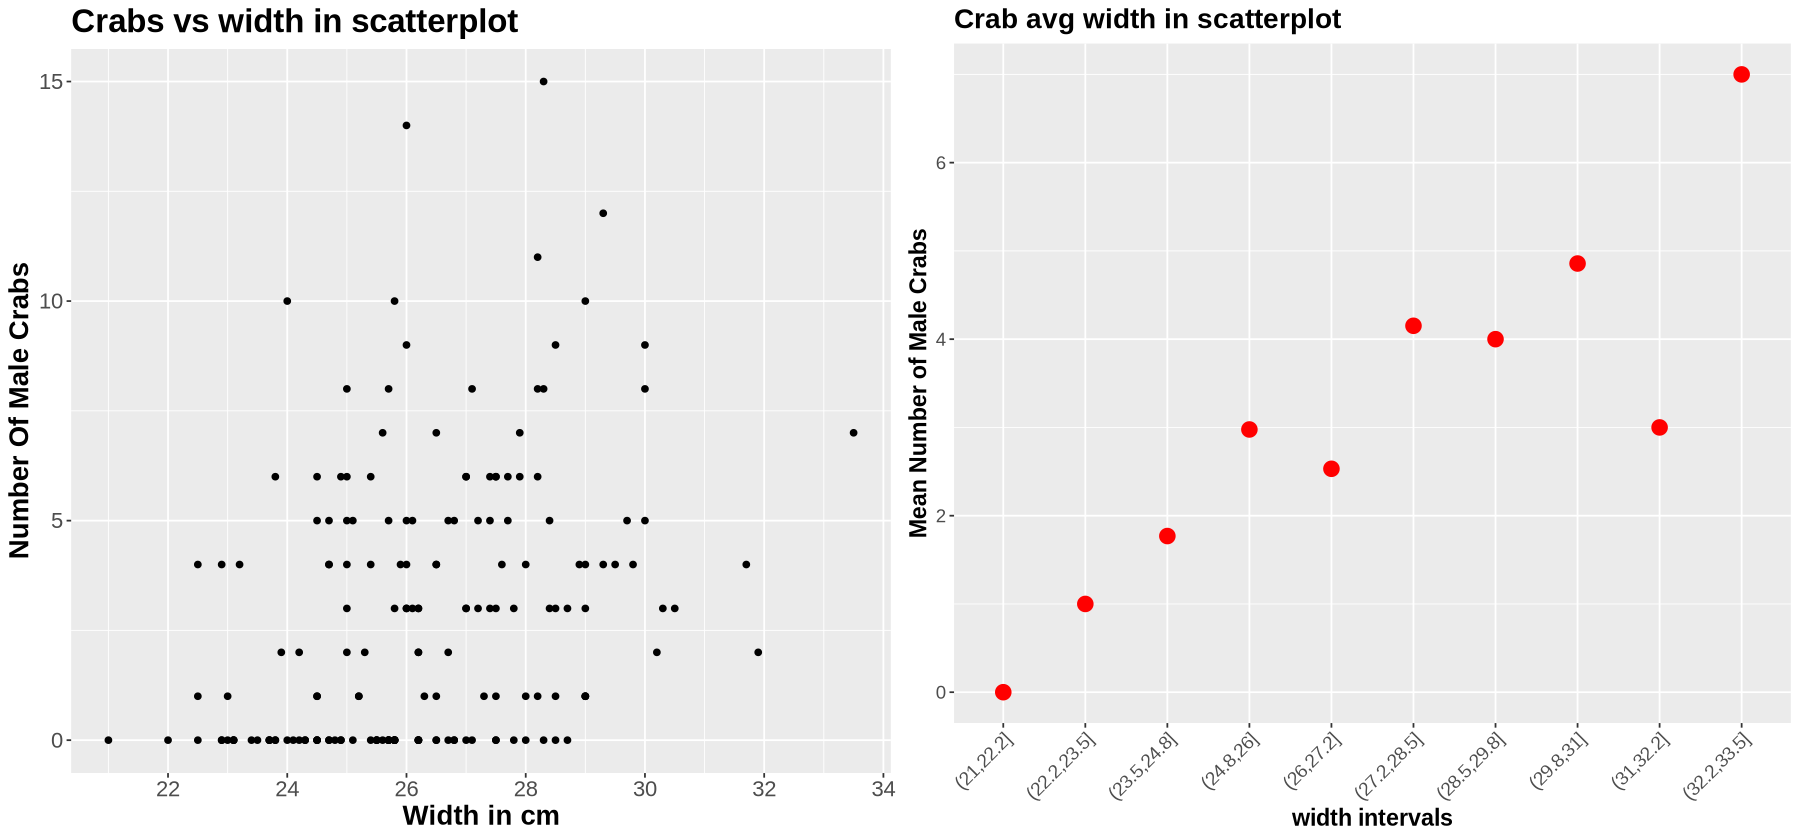

In [7]:
# Crabs_avg_width_scatterplot <- ... %>%
#   ggplot() +
#   ...(aes(..., ...), colour = "red", size = 4) +
#   labs(y = ..., x = ...) +
#   ggtitle(...) +
#   theme(
#     text = element_text(size = 14),
#     plot.title = element_text(face = "bold"),
#     axis.title = element_text(face = "bold"),
#     legend.title = element_text(face = "bold"),
#     axis.text.x = element_text(angle = 45, hjust = 1)
#   )

# your code here
Crabs_avg_width_scatterplot <- Crabs_group_avg_width %>%
  ggplot() +
  geom_point(aes(width_intervals, mean_n_males), colour = "red", size = 4) +
  labs(y = "Mean Number of Male Crabs", x = "width intervals") +
  ggtitle("Crab avg width in scatterplot") +
  theme(
    text = element_text(size = 14),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold"),
    legend.title = element_text(face = "bold"),
    axis.text.x = element_text(angle = 45, hjust = 1)
  )

options(repr.plot.width = 15, repr.plot.height = 7)
plot_grid(Crabs_vs_width_scatterplot, Crabs_avg_width_scatterplot, ncol = 2)

In [8]:
test_1.3()

Test passed 🌈
Test passed 😀
Test passed 🎊
Test passed 😀
Test passed 🎉
Test passed 🥳
Test passed 😸
[1] "Success!"


**Question 1.4**
<br>{points: 1}

By looking at `Crabs_avg_width_scatterplot`, graphically speaking, what is the relationship between `n_males` and carapace `width`?

**A.** Positive.

**B.** Negative.

**C.** No relationship.

*Assign your answer to the object `answer1.4` (character type surrounded by quotes).*

In [9]:
# answer1.4 <- ...

# your code here
answer1.4 <- "A"

answer1.4

[1] "A"

In [10]:
test_1.4()

Test passed 🌈
Test passed 🌈
Test passed 🥇
[1] "Success!"


If we compare `Crabs_vs_width_scatterplot` and `Crabs_avg_width_scatterplot`, we can see that working with the averages of `n_males` by carapace `width` intervals gives us a clearer perspective of the relationship between these two variables. Nonetheless, we need to find a suitable model to confirm this statistically.

Recall that the residual component in an ordinary linear regression model, namely $\varepsilon_i$, is assumed to be Normally distributed, making the response $Y_i$ Normally distributed. In this case, our response variable is the "Number of male crabs" (count!). Counts distributions can be asymmetric, and they are non-negative, thus the Normal distribution might not be adequate. Nor the logistic regression, since we are not estimating proportions. 

A very useful distribution to model counts (not the only one!) is the Poisson distribution. 

**The Poisson Regression**

A Poisson random variable takes discrete non-negative integer values that count something in a given timeframe or even in a space such as a geographic unit. A particularity of the Poisson distribution is that its mean is equal to its variance. Thus, any factor that affects the mean will also affect the variance. This fact could be a potential drawback for using a Poisson regression model.

The Poisson regression model is given by:

$$Y_i|\mathbf{X}_i \sim \text{Poisson}(\lambda_i),$$

$$\log(\lambda_i) = \beta_0 + \beta_1X_{1,i} + \ldots + \beta_pX_{1,p}$$

or equivalently,

$$\lambda_i = e^{\beta_0 + \beta_1X_{1,i} + \ldots + \beta_pX_{1,p}}$$

where each variable has its own mean, $\lambda_i$, and variance, also $\lambda_i$. The parameter $\lambda_i$ is interpreted as the risk of an event occurring in a given timeframe or even a space. Note that $\lambda_i$ cannot be negative, hence it is a useful function to link $E[Y_i|\mathbf{X}_i]=\lambda_i$ with the the linear component.

**Question 1.5**
<br>{points: 1}

For our `crabs` dataset the events are the number of male crabs, `n_males`, around a space: the female breeding nest. Suppose we want to make inference on whether the carapace `width` is related to the response `n_males`. Thus, we could use Poisson regression. Let $X_{\texttt{width}_i}$ be the $i$th value for the input `width` in our dataset `crabs`. The model's regression equation will be:

$$\log(\lambda_i) = \beta_0 + \beta_1 X_{\texttt{width}_i}.$$

Let us plot the predictions of this model on top of `Crabs_vs_width_scatterplot`. Use `geom_smooth()` with `method = "glm"` and `method.args = list(family = poisson)`.

*Fill out those parts indicated with `...`, uncomment the corresponding code in the cell below, and run it.*

`geom_smooth()` using formula = 'y ~ x'


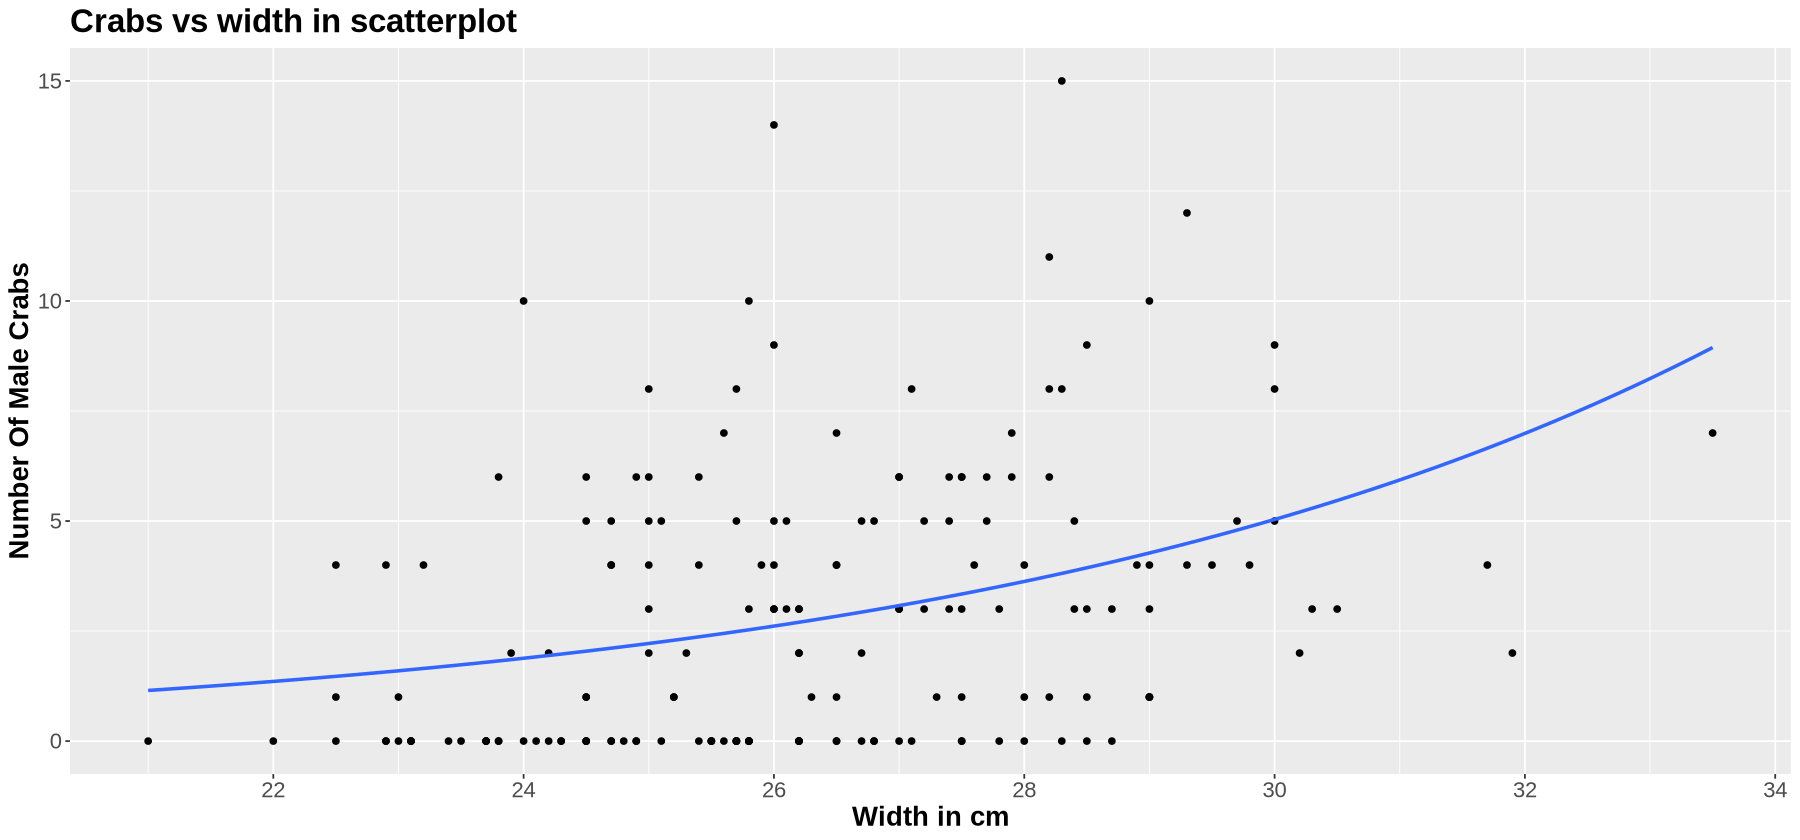

In [11]:
# Crabs_vs_width_scatterplot <- 
#   Crabs_vs_width_scatterplot +
#   ...(
#     aes(..., ...), 
#     ..., se = FALSE,
#     ...)

# your code here
Crabs_vs_width_scatterplot <- 
  Crabs_vs_width_scatterplot +
  geom_smooth(
    aes(width, n_males), 
    method = "glm", se = FALSE,
    method.args = list(family = poisson))

Crabs_vs_width_scatterplot

In [12]:
test_1.5()

Test passed 🥇
Test passed 🎉
Test passed 🥇
Test passed 🌈
Test passed 🥳
Test passed 😀
Test passed 🥇
[1] "Success!"


As seen in other models, the parameters $\beta_0, \beta_1, \dots, \beta_{p}$ are unknown population coefficients that we want to estimate using data. 

In order to fit a Poisson regression model, we can also use the function `glm()` and its argument `family = poisson` (required to specify the Poisson nature of the response), which obtains the estimates $\hat{\beta}_0, \hat{\beta}_1, \dots \hat{\beta}_{p}$. The estimates are obtained through maximum likelihood where we assume a Poisson joint probability mass function of the $n$ responses $Y_i$.

**Question 1.6**
<br>{points: 1}

Using `glm()`, estimate a Poisson regression model with `n_males` as a response and two input variables: `width` ($X_{\texttt{width}_i}$) and `color` ($X_{\texttt{color_darker}_i}$, $X_{\texttt{color_light}_i}$, and $X_{\texttt{color_medium}_i}$) for the $i$th observation:

$$
log(\lambda_i) = \beta_0 + \beta_1 X_{\texttt{width}_i} + \beta_2 X_{\texttt{color_darker}_i} + \beta_3 X_{\texttt{color_light}_i} + \beta_4 X_{\texttt{color_medium}_i}.
$$

Note that the ordinal input `color` has four levels (where `dark` is the baseline): 

In [13]:
levels(crabs$color)

[1] "dark"   "darker" "light"  "medium"

Therefore, we have three dummy variables: $X_{\texttt{color_darker}_i}$, $X_{\texttt{color_light}_i}$, and $X_{\texttt{color_medium}_i}$. Depending on the `color`, these dummy variables take on the following values:

- When `color` is `darker`, then $X_{\texttt{color_darker}_i} = 1$ while the other two dummy variables $X_{\texttt{color_light}_i} = X_{\texttt{color_medium}_i} = 0$.
- When `color` is `light`, then $X_{\texttt{light}_i} = 1$ while the other two dummy variables $X_{\texttt{color_darker}_i} = X_{\texttt{color_medium}_i} = 0$.
- When `color` is `medium`, then $X_{\texttt{medium}_i} = 1$ while the other two dummy variables $X_{\texttt{color_darker}_i} = X_{\texttt{color_light}_i} = 0$.

Call the model `crabs_Poisson_model`.
    
*Fill out those parts indicated with `...`, uncomment the corresponding code in the cell below, and run it.*    

In [14]:
# crabs_Poisson_model <- ...(
#   ...,
#   ...,
#   ...
# )

# your code here
crabs_Poisson_model <- glm(
  formula = n_males ~ width + color,
  data = crabs,
  family = poisson
)


summary(crabs_Poisson_model)


Call:
glm(formula = n_males ~ width + color, family = poisson, data = crabs)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0415  -1.9581  -0.5575   0.9830   4.7523  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.08640    0.55750  -5.536 3.09e-08 ***
width        0.14934    0.02084   7.166 7.73e-13 ***
colordarker -0.01100    0.18041  -0.061   0.9514    
colorlight   0.43636    0.17636   2.474   0.0133 *  
colormedium  0.23668    0.11815   2.003   0.0452 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 632.79  on 172  degrees of freedom
Residual deviance: 559.34  on 168  degrees of freedom
AIC: 924.64

Number of Fisher Scoring iterations: 6


In [15]:
test_1.6()

Test passed 😀
Test passed 🎊
Test passed 🌈
[1] "Success!"


**Question 1.7**
<br>{points: 1}

Report the estimated coefficients, their standard errors, and corresponding $p$-values using `tidy()` with `crabs_Poisson_model`. Include the corresponding asymptotic 95% confidence intervals. Store the results in the variable `crabs_Poisson_model_results`.

*Fill out those parts indicated with `...`, uncomment the corresponding code in the cell below, and run it.*

In [16]:
# crabs_Poisson_model_results <- 
#   ...(..., conf.int = TRUE) %>%
#   mutate_if(is.numeric, round, 3)

# your code here
crabs_Poisson_model_results <- 
  tidy(crabs_Poisson_model, conf.int = TRUE) %>%
  mutate_if(is.numeric, round, 3)

crabs_Poisson_model_results

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-3.0864,0.5575,-5.5362,0.0000,-4.1781,-1.9927
width,0.1493,0.0208,7.1659,0.0000,0.1083,0.1900
colordarker,-0.0110,0.1804,-0.0610,0.9514,-0.3733,0.3359
colorlight,0.4364,0.1764,2.4743,0.0133,0.0834,0.7764
colormedium,0.2367,0.1181,2.0032,0.0452,0.0091,0.4728


In [17]:
test_1.7()

Test passed 😸
Test passed 🎉
Test passed 🥇
Test passed 😀
Test passed 🎊
[1] "Success!"


**Question 1.8**
<br>{points: 1}

Since the link function is logarithmic, we can also interpret the exponentiated coefficients. Add to `crabs_Poisson_model_results` the estimate, and 95% confidence interval, of $e^{\beta_j}, j=0,...,p$. 

*Fill out those parts indicated with `...`, uncomment the corresponding code in the cell below, and run it.*

In [18]:
# crabs_Poisson_model_results <- 
#   crabs_Poisson_model_results %>%
#   mutate(
#     exp.estimate = ...,
#     exp.conf.low = ...,
#     exp.conf.high = ...) %>%
#   mutate_if(is.numeric, round, 4)

# your code here
# crabs_Poisson_model_results <- 
  crabs_Poisson_model_results %>%
  mutate(
    exp.estimate = exp(estimate),
    exp.conf.low = exp(conf.low),
    exp.conf.high = exp(conf.high)) %>%
  mutate_if(is.numeric, round, 4)


crabs_Poisson_model_results


term,estimate,std.error,statistic,p.value,conf.low,conf.high,exp.estimate,exp.conf.low,exp.conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-3.0864,0.5575,-5.5362,0.0000,-4.1781,-1.9927,0.0457,0.0153,0.1363
width,0.1493,0.0208,7.1659,0.0000,0.1083,0.1900,1.1610,1.1144,1.2092
colordarker,-0.0110,0.1804,-0.0610,0.9514,-0.3733,0.3359,0.9891,0.6885,1.3992
colorlight,0.4364,0.1764,2.4743,0.0133,0.0834,0.7764,1.5471,1.0870,2.1736
colormedium,0.2367,0.1181,2.0032,0.0452,0.0091,0.4728,1.2671,1.0091,1.6045


In [19]:
test_1.8()

Test passed 🥇
Test passed 😸
Test passed 😸
Test passed 🎊
Test passed 🎉
[1] "Success!"


Note that you can also get the exponentiated estimated coefficients using `tidy` when the link function is `log` or `logit`. Note that `std.error` and `statistic` are not adjusted and it does not report the raw coefficients.

In [20]:
tidy(crabs_Poisson_model, exponentiate = FALSE,conf.int = TRUE)

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-3.08640395,0.55749968,-5.53615372,3.091862e-08,-4.178132932,-1.9926780
width,0.14934271,0.02084066,7.16592870,7.726098e-13,0.108326769,0.1900266
colordarker,-0.01099663,0.18040985,-0.06095361,9.513962e-01,-0.373250047,0.3358592
colorlight,0.43636303,0.17635775,2.47430590,1.334953e-02,0.083404427,0.7764330
colormedium,0.23667654,0.11814844,2.00321341,4.515439e-02,0.009123933,0.4727799


In [21]:
tidy(crabs_Poisson_model, exponentiate = TRUE,conf.int = TRUE)

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),0.04566588,0.55749968,-5.53615372,3.091862e-08,0.0153271,0.1363298
width,1.16107084,0.02084066,7.16592870,7.726098e-13,1.1144118,1.2092818
colordarker,0.98906361,0.18040985,-0.06095361,9.513962e-01,0.6884931,1.3991419
colorlight,1.54707032,0.17635775,2.47430590,1.334953e-02,1.0869813,2.1737048
colormedium,1.26703122,0.11814844,2.00321341,4.515439e-02,1.0091657,1.6044482


**Question 1.9**
<br>{points: 1}

Using a **significance level $\alpha = 0.05$**, and the output in `crabs_Poisson_model_results`, which of the following statements is TRUE?

**A.** There's enough evidence to reject the null hypothesis that the coefficient of carapace `width` is zero.

**B.** There's enough evidence to reject the null hypothesis that, for any width, the mean numbers of male crabs with `dark` and `darker` colors of the prosoma are equal.

**C.** There's enough evidence to reject the null hypothesis that, for any width, the mean numbers of male crabs with `dark` and `light` colors of the prosoma are equal. 

**D.** There's enough evidence to reject the null hypothesis that, for any width, the mean numbers of male crabs with `dark` and `medium` colors of the prosoma are equal.  

*Assign your answers to the object `answer1.9`. Your answers have to be included in a single string indicating the correct options **in alphabetical order** and surrounded by quotes (e.g., `"ABCD"` indicates you are selecting the four options).*

In [22]:
# answer1.9 <- 

# your code here
answer1.9 <- "ACD"

answer1.9

[1] "ACD"

In [23]:
test_1.9()

Test passed 😸
Test passed 🎉
[1] "Success!"


**Interpretation of estimated coefficients for continuous covariates** 

Firstly, let us focus on the coefficient interpretation corresponding to carapace `width`, *while keeping `color` constant*. Consider an observation with a given value $X_{\texttt{width}} = \texttt{w}$ cm, and another observation with a given $X_{\texttt{width + 1}} = \texttt{w} + 1$ cm (i.e., an increase of $1$ cm). Then we have their corresponding regression equations:

$$
\log \lambda_{\texttt{width}} = \beta_0 + \beta_1 \overbrace{\texttt{w}}^{X_{\texttt{width}}} + \overbrace{\beta_2 X_{\texttt{color_darker}} + \beta_3 X_{\texttt{color_light}} + \beta_4 X_{\texttt{color_medium}}}^{\text{Constant}}
$$
$$
\log \lambda_{\texttt{width + 1}} = \beta_0 + \beta_1 \underbrace{(\texttt{w} + 1)}_{X_{\texttt{width + 1}}} + \underbrace{\beta_2 X_{\texttt{color_darker}} + \beta_3 X_{\texttt{color_light}} + \beta_4 X_{\texttt{color_medium}}.}_{\text{Constant}}
$$

We take the difference between both equations as:

\begin{align*}
\log \lambda_{\texttt{width + 1}} - \log \lambda_{\texttt{width}} &= \beta_1 (\texttt{w} + 1) - \beta_1 \texttt{w} \\
&= \beta_1.
\end{align*}

Then, we apply the logarithm property for a ratio:

\begin{align*}
\log \frac{\lambda_{\texttt{width + 1}} }{\lambda_{\texttt{width}}} &= \log \lambda_{\texttt{width + 1}} - \log \lambda_{\texttt{width}} \\
&= \beta_1.
\end{align*}

Finally, we have to exponentiate the previous equation:

$$
\frac{\lambda_{\texttt{width + 1}} }{\lambda_{\texttt{width}}} = e^{\beta_1}.
$$

This expression indicates that the mean count varies in a multiplicative way when a continuous covariate increases by 1 unit, i.e., $\lambda_{\texttt{width + 1}}= e^{\beta_1}\lambda_{\texttt{width}}$.

**Question 1.10**
<br>{points: 1}

**Using the column `exp.estimate` from `crabs_Poisson_model_results`**, what is the correct interpretation of the regression equation's estimated slope for `width`?

**A.** The mean count of male crabs (`n_males`) around a female breeding nest decreases by $161\%$ when increasing the carapace `width` by $1$ cm, *while keeping `color` constant*.

**B.** The mean count of male crabs (`n_males`) around a female breeding nest increases by $161\%$ when increasing the carapace `width` by $1$ cm, *while keeping `color` constant*.

**C.** The mean count of male crabs (`n_males`) around a female breeding nest increases by $16.1\%$ when increasing the carapace `width` by $1$ cm, *while keeping `color` constant*.

**D.** The mean count of male crabs (`n_males`) around a female breeding nest decreases by $16.1\%$ when increasing the carapace `width` by $1$ cm, *while keeping `color` constant*.

**E.** The mean count of *dark* male crabs (`n_males`) around a female breeding nest increases by $161\%$ when increasing the carapace `width` by $1$ cm.

**F.** The mean count of *dark* male crabs (`n_males`) around a female breeding nest increases by $16.1\%$ when increasing the carapace `width` by $1$ cm.

*Assign your answer to the object `answer1.10`. Your answer should be one of `"A"`, `"B"`, `"C"`, `"D"`, `"E"`, or `"F"` surrounded by quotes.*

In [24]:
# answer1.10 <- ...

# your code here
answer1.10 <- "C"

answer1.10

[1] "C"

In [25]:
test_1.10()

Test passed 😸
Test passed 🥇
Test passed 🎉
[1] "Success!"


**Interpretation of estimated coefficients of dummy variables** 

*Keeping `width` constant*, at any value (recall assumption of additive models!) consider an observation from the `darker` group: 

Then we have their corresponding regression equations:

$$
\log \lambda_{\texttt{width}} = \beta_0 + \beta_1 \overbrace{\texttt{w}}^{\text{Constant}} + \beta_2 X_{\texttt{color_darker}} + \beta_3 X_{\texttt{color_light}} + \beta_4 X_{\texttt{color_medium}}
$$

$$
\log \lambda_{\texttt{width,dark}} = \beta_0 + \beta_1 \texttt{w} + \beta_2 \times 0  + \beta_3 \times 0  + \beta_4 \times 0 
$$

$$
\log \lambda_{\texttt{width,darker}} = \beta_0 + \beta_1 \texttt{w} + \beta_2 \times 1 + \beta_3 \times 0 + \beta_4 \times 0.
$$

We take the difference between both equations as:

\begin{align*}
\log \lambda_{\texttt{width,darker}} - \log \lambda_{\texttt{width,dark}} = \beta_2.
\end{align*}

Then, we apply the logarithm property for a ratio:

\begin{align*}
\log \frac{\lambda_{\texttt{width,darker}} }{\lambda_{\texttt{width,dark}}} &= \log \lambda_{\texttt{width,darker}} - \log \lambda_{\texttt{width,dark}} \\
&= \beta_2.
\end{align*}

Finally, we have to exponentiate the previous equation:

$$
\frac{\lambda_{\texttt{width,darker}} }{\lambda_{\texttt{width,dark}}} = e^{\beta_2}.
$$

The expression $\frac{\lambda_{\texttt{width,darker}} }{\lambda_{\texttt{width,dark}}} = e^{\beta_2}$ indicates that the mean count changes in a multiplicative way between the two groups.

**Question 1.11**
<br>{points: 1}

Let us move on to the interpretation of the coefficient corresponding to `light` from `color` (with reference level `dark`).

Using the `crabs_Poisson_model_results` tibble, what is the correct interpretation of the regression estimated coefficient for the dummy variable `light`?

**A.** The mean count of male crabs (`n_males`) around a female breeding nest is $54.7\%$ lower in the  `light` prosoma group compared to `dark` group, *while keeping the carapace `width` constant (for any width value).*

**B.** The mean count of male crabs (`n_males`) around a female breeding nest $54.7\%$ higher in the  `light` prosoma group compared to `dark` group, *while keeping the carapace `width` constant (for any width value).*

**C.** The mean count of male crabs (`n_males`) around a female breeding nest $154.7\%$ higher in the  `light` prosoma group compared to `dark` group, *while keeping the carapace `width` constant (for any width value).*

**D.** The mean count of male crabs (`n_males`) around a female breeding nest $154.7\%$ lower in the  `light` prosoma group compared to `dark` group, *while keeping the carapace `width` constant (for any width value).*

**E.** The mean count of male crabs (`n_males`) around a female breeding nest is $54.7\%$ lower in the  `dark` prosoma group compared to `light` group, *while keeping the carapace `width` constant (for any width value).*

**F.** The mean count of male crabs (`n_males`) around a female breeding nest $54.7\%$ higher in the  `dark` prosoma group compared to `light` group, *while keeping the carapace `width` constant (for any width value).*

*Assign your answer to the object `answer1.11`. Your answer should be one of `"A"`, `"B"`, `"C"`, `"D"`, `"E"`, or `"F"` surrounded by quotes.*

In [26]:
# answer1.11 <- ...

# your code here
answer1.11 <- "B"

answer1.11

[1] "B"

In [27]:
test_1.11()

Test passed 😸
Test passed 😀
Test passed 😸
[1] "Success!"


**Question 1.12**
<br>{points: 1}

Suppose we want to predict the mean count of male crabs (`n_males`) around a female breeding nest with a carapace `width` of $27.5$ cm and a `light` `color` of the prosoma. Then, using the function `predict()` with the object `crabs_Poisson_model`, obtain the corresponding prediction.

> **Hint:** Check the argument `type` when coding this prediction.

*Assign your answer to the object `answer1.12`. Fill out those parts indicated with `...`, uncomment the corresponding code in the cell below, and run it.*

In [28]:
# answer1.12 <- 
#   ...(...,
#     tibble(..., ..., ...),
#     type = ...
#   )

# your code here
answer1.12 <- 
  predict(crabs_Poisson_model,
    tibble(width = 27.5, color = "light"),
    type = "response"
  )


answer1.12

1 
4.292562

In [29]:
test_1.12()

Test passed 🎊
Test passed 🥳
Test passed 🎊
[1] "Success!"
